Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
data = pd.read_csv('medical_insurance.csv')

In [3]:
# Displaying the dataset's basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


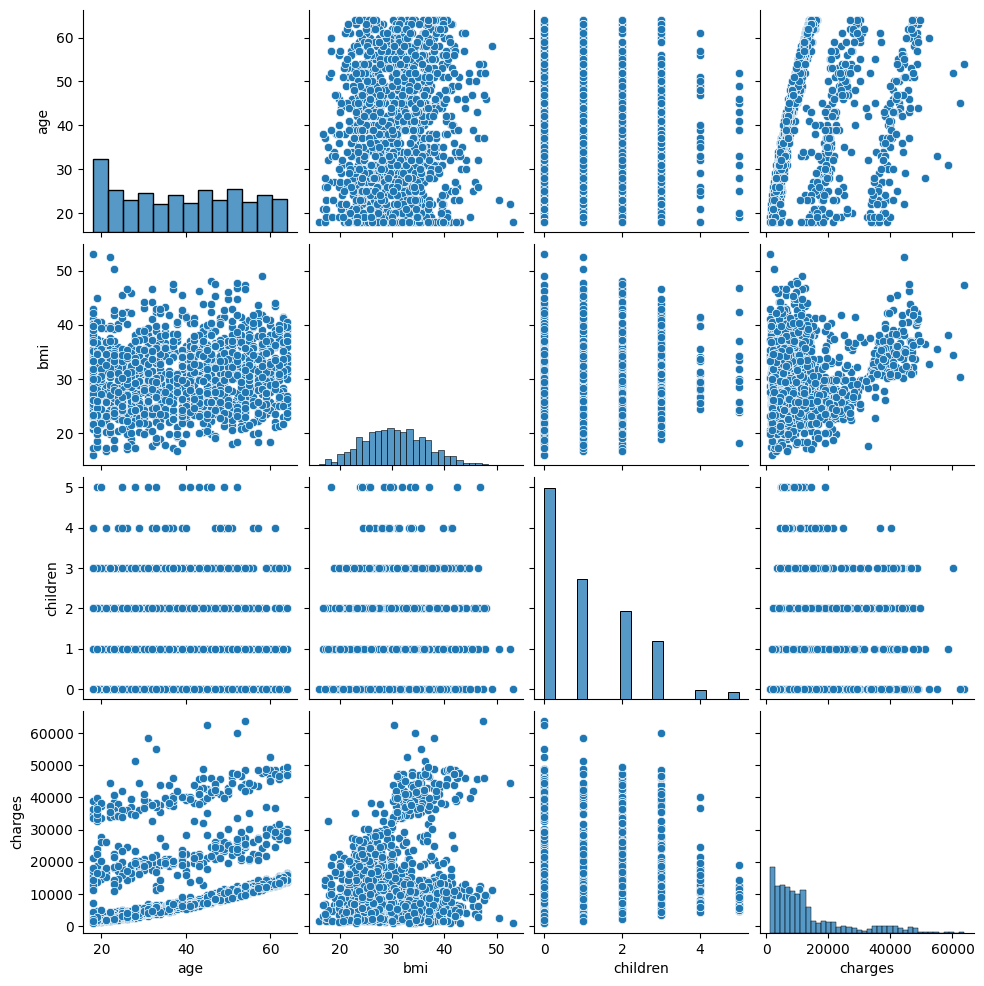

In [4]:
#Using pairplots to see the relationship between features
sns.pairplot(data)
plt.show()

In [5]:
# Showing the dataset's first few rows 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Statistics summary
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Checking if there are missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Charges check start

In [8]:
charges = data['charges'].groupby(data['region']).sum().sort_values(ascending = True)
charges

region
northwest    8.275518e+06
southwest    8.320310e+06
northeast    8.867126e+06
southeast    1.129756e+07
Name: charges, dtype: float64

In [9]:
# Ploting charges by region with plotly.express aka px???

fig = px.bar(charges, title='Charges by Region', color=charges, color_continuous_scale='plasma')
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    titlefont=dict(size=20),
    xaxis_tickangle=-45,  # Specify the angle at which x-axis labels are displayed
)
fig.update_yaxes(showticklabels=False, title=' ')
fig.update_xaxes(title=' ')
fig.update_traces(
    texttemplate='%{y}',  # Display y values as text on the bars
    textposition='outside',  # Position the text outside the bars
    hovertemplate='<b>%{x}</b><br>Charges: %{y}',  # Customize hover template
)
fig.show()

<Axes: xlabel='region', ylabel='charges'>

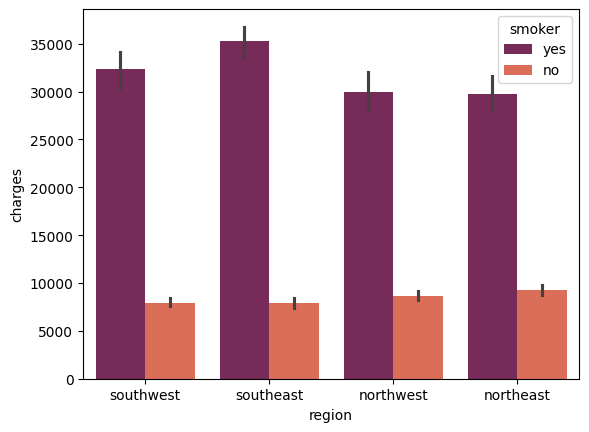

In [10]:
#Checking the rates for smokers by regions

sns.barplot(data = data, x = 'region', y = 'charges', hue = 'smoker', palette = 'rocket' )

In [11]:
# Using LabelEncoder for convrting the labels od categories to numbers
label = preprocessing.LabelEncoder()
data_preprocessed = data.copy()

label.fit(data_preprocessed.sex.drop_duplicates())
data_preprocessed.sex = label.transform(data_preprocessed.sex)

label.fit(data_preprocessed.smoker.drop_duplicates())
data_preprocessed.smoker = label.transform(data_preprocessed.smoker)

label.fit(data_preprocessed.region.drop_duplicates())
data_preprocessed.region = label.transform(data_preprocessed.region)

<Axes: >

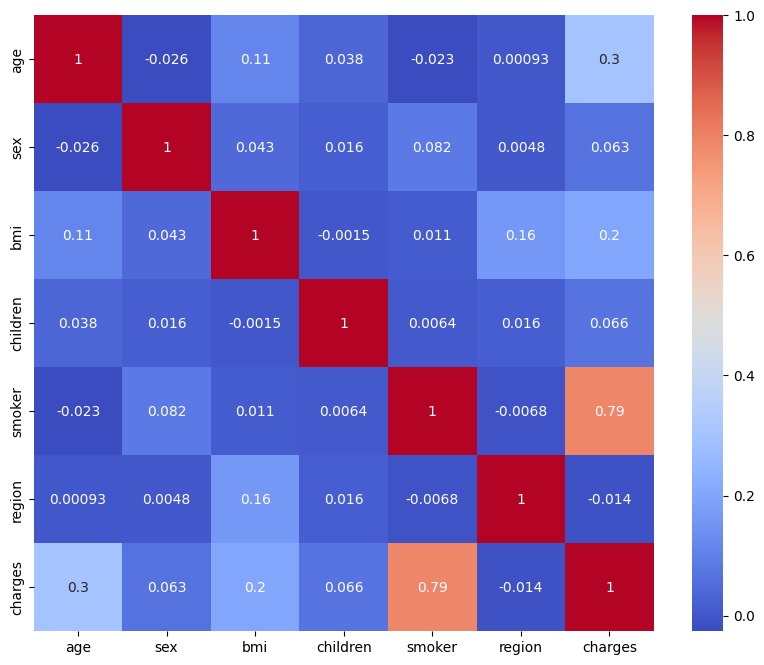

In [12]:
#data_preprocessed.head()
#Visualization of a heatmap to show the correlation between the features in the dataset
plt.figure(figsize=(10,8))
sns.heatmap(data_preprocessed.corr(),cmap='coolwarm',annot=True)

Preprocessing the data

In [13]:
# Nameing the features as (X) and target as (y)
X = data.drop('charges', axis=1)
y = data['charges']

#categorical features with one-hot encoding and scaling numerical features
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Separating the data into training sets and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Builidng the (Artifical) Neural Network

In [14]:
def build_model():
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    return model

model = build_model()

#architecture of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Training the model


In [15]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

#Evaluate on the test data
test_loss, test_mae_100 = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae_100:.2f}')


Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 323398368.0000 - mean_absolute_error: 13351.7764 - val_loss: 318598208.0000 - val_mean_absolute_error: 13337.6484
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 328194816.0000 - mean_absolute_error: 13392.7783 - val_loss: 315459712.0000 - val_mean_absolute_error: 13221.8965
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 315729888.0000 - mean_absolute_error: 12948.4941 - val_loss: 298822848.0000 - val_mean_absolute_error: 12603.1738
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 299983616.0000 - mean_absolute_error: 12362.9268 - val_loss: 251512832.0000 - val_mean_absolute_error: 10728.4932
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 242926960.0000 - mean_absolute_error: 10139.9746 - val_loss: 180447104.0000 - val_mean_absolute_error: 8112.7236
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169259056.0000 - mean_absolute_error: 7837.0332 - val_loss: 132235832.0000 - 

In [16]:
#Calcualting the relative error for easier interpreation
mean_charges = data['charges'].mean()
relative_error = (test_mae_100 / mean_charges) * 100
print(f"Relative Error: {relative_error:.2f}%")

Relative Error: 21.96%


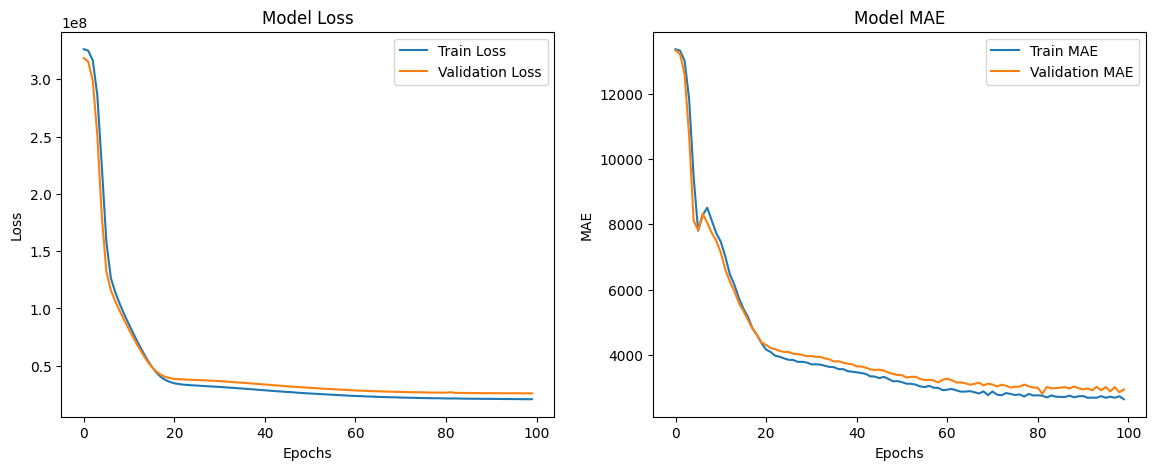

In [17]:
plt.figure(figsize=(14, 5))

#Plot of the loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Plot of the MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()



18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


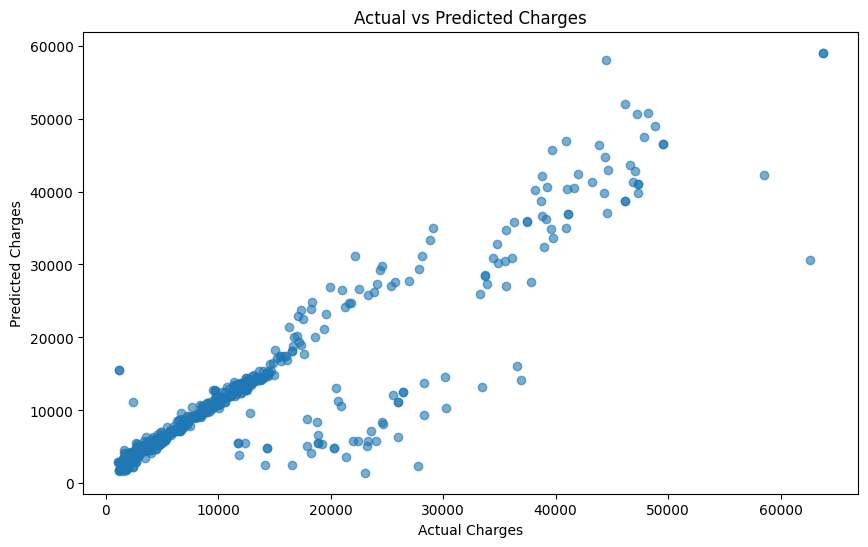

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize actual vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()


Training the model using 500 epochs

In [19]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=32, verbose=1)

test_loss, test_mae_500 = model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae_500:.2f}')


Epoch 1/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18612292.0000 - mean_absolute_error: 2546.5186 - val_loss: 25721778.0000 - val_mean_absolute_error: 3106.4119
Epoch 2/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20360772.0000 - mean_absolute_error: 2745.7275 - val_loss: 25812956.0000 - val_mean_absolute_error: 2910.3792
Epoch 3/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19918974.0000 - mean_absolute_error: 2627.7271 - val_loss: 25814314.0000 - val_mean_absolute_error: 2910.3347
Epoch 4/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21079194.0000 - mean_absolute_error: 2591.3079 - val_loss: 25642450.0000 - val_mean_absolute_error: 3040.4565
Epoch 5/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21817982.0000 - mean_absolute_error: 2813.3203 - val_loss: 25701422.0000 - val_mean_absolute_error: 2885.9250
Epoch 6/500
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21294364.0000 - mean_absolute_error: 2700.5791 - val_loss: 25734472.0000 - val_mean_absolute_err

In [20]:
#Calcualting relative error
mean_charges = data['charges'].mean()
relative_error = (test_mae_500 / mean_charges) * 100
print(f"Relative Error: {relative_error:.2f}%")

Relative Error: 18.30%


Comparison of error with the baseline model 

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred1 = lm.predict(X_test)

In [24]:
#Calculating the Mean Absolute Error and Mean Square Error of the Linear regression
mae_lin_reg = mean_absolute_error(y_test, y_pred1)
mse_lin_reg = mean_squared_error(y_test, y_pred1)

print("Linear Regression:")
print(f"MAE: {mae_lin_reg:.2f}")
print(f"MSE: {mse_lin_reg:.2f}")

Linear Regression:
MAE: 4130.79
MSE: 39843374.39


In [25]:
#Calcualting the relative error of the linear regression
relative_error_lin_reg = (mae_lin_reg / mean_charges) * 100
print(f"Linear Regression Relative Error: {relative_error_lin_reg:.2f}%")


Linear Regression Relative Error: 31.15%


Cross Validation Try

In [26]:
# Number of folds
k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)

mae_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    # Build a new model for each fold
    model = build_model()
    
    model.fit(X_train_cv, y_train_cv, validation_data=(X_val_cv, y_val_cv), epochs=100, batch_size=32, verbose=0)
    
    val_loss, val_mae = model.evaluate(X_val_cv, y_val_cv, verbose=0)
    
    mae_scores.append(val_mae)
    
    print(f'Fold MAE: {val_mae:.2f}')

# average MAE across all folds
mean_mae = np.mean(mae_scores)
print(f'\nAverage MAE across {k} folds: {mean_mae:.2f}')


Fold MAE: 2841.96
Fold MAE: 3011.35
Fold MAE: 2869.30
Fold MAE: 2619.95
Fold MAE: 2771.13

Average MAE across 5 folds: 2822.74
